In [ ]:
# START

## ***LOADING DATASET ***

In [49]:
import pandas as pd

# Load the dataset
df = pd.read_parquet('/content/sampled_flight_data2019.parquet')

# Display the first few rows
print(df.head())

# Check basic info about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())


  FlightDate                Airline Origin Dest  Cancelled  Diverted  \
0 2019-01-01            Horizon Air    SEA  PDX      False     False   
1 2019-01-01        JetBlue Airways    BQN  FLL      False     False   
2 2019-01-01       Spirit Air Lines    LAS  MSP      False     False   
3 2019-01-01  SkyWest Airlines Inc.    ORD  TYS      False     False   
4 2019-01-01        JetBlue Airways    SJU  TPA      False     False   

   CRSDepTime DepTime  DepDelayMinutes  DepDelay  ...  CRSArrTime  ArrDelay  \
0        2310   01:20            130.0     130.0  ...        2355     126.0   
1          59   01:10             11.0      11.0  ...         239      -2.0   
2         115   01:11              0.0      -4.0  ...         623     -13.0   
3        2215   01:12            177.0     177.0  ...          45     184.0   
4        1901   02:53            472.0     472.0  ...        2110     448.0   

   ArrDel15  ArrivalDelayGroups  ArrTimeBlk  DistanceGroup  \
0       1.0                 8.

# **HANDLING MISSING VALUES**

REMOVING ROWS HAVING ANY MISSING VALUES


In [50]:
# HANDLING MISSING VALUES
# Drop rows with missing values (if appropriate)

df = df.dropna()
df.drop_duplicates(keep='first',inplace=True)
df.shape

(191926, 64)

In [51]:
import pandas as pd

# Convert 'FlightDate' to datetime
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

# Check the result
print(df['FlightDate'].head())


0   2019-01-01
1   2019-01-01
2   2019-01-01
3   2019-01-01
4   2019-01-01
Name: FlightDate, dtype: datetime64[us]


In [100]:
# Extract year
# df['Year'] = df['FlightDate'].dt.year
# -------------------------------------------------
# Extract week of the year
# df['Week'] = df['FlightDate'].dt.isocalendar().week
# -------------------------------------------------
# Extract month (1 for January, 2 for February, etc.)
# df['Month'] = df['FlightDate'].dt.month
# --------------------------------------------------


In [53]:
# Extract week of the year
df['Week'] = df['FlightDate'].dt.isocalendar().week


In [101]:
print(df[['FlightDate','Year','Month','DayofMonth','Week','DayOfWeek']].head())



  FlightDate  Year  Month  DayofMonth  Week  DayOfWeek
0 2019-01-01  2019      1           1     1          2
1 2019-01-01  2019      1           1     1          2
2 2019-01-01  2019      1           1     1          2
3 2019-01-01  2019      1           1     1          2
4 2019-01-01  2019      1           1     1          2


In [55]:
print(df[['Origin', 'Dest']].head())

  Origin Dest
0    SEA  PDX
1    BQN  FLL
2    LAS  MSP
3    ORD  TYS
4    SJU  TPA


**UNDERSTANDING DEPARTURE COLUMNS**


**CRSDepTime**    - Computer Reservation System Departure Time


**DepTime**    -Actual FlightDeparture Time      


**DepDealy**      - Delays -ve early Dep   +ve Late Dep


**DepDelayMinutes**   - only indicated +ve Departures

**DepDel15**     - Only indicates Dep>15 . . . 1 -true, 0 -false

In [56]:
print(df[['CRSDepTime','DepTime','DepDelay','DepDelayMinutes','DepDel15']].head(10))

   CRSDepTime DepTime  DepDelay  DepDelayMinutes  DepDel15
0        2310   01:20     130.0            130.0       1.0
1          59   01:10      11.0             11.0       0.0
2         115   01:11      -4.0              0.0       0.0
3        2215   01:12     177.0            177.0       1.0
4        1901   02:53     472.0            472.0       1.0
5         400   04:19      19.0             19.0       1.0
6         535   05:31      -4.0              0.0       0.0
7         550   05:49      -1.0              0.0       0.0
8         558   05:50      -8.0              0.0       0.0
9         600   05:51      -9.0              0.0       0.0


UNDERSTANING ARRIVAL COLUMNS FROM DATASET

In [57]:
print(df[['CRSArrTime','ArrTime','ArrDelay','ArrDelayMinutes','ArrDel15']].head(10))

   CRSArrTime  ArrTime  ArrDelay  ArrDelayMinutes  ArrDel15
0        2355    201.0     126.0            126.0       1.0
1         239    237.0      -2.0              0.0       0.0
2         623    610.0     -13.0              0.0       0.0
3          45    349.0     184.0            184.0       1.0
4        2110    438.0     448.0            448.0       1.0
5         544    605.0      21.0             21.0       1.0
6         700    652.0      -8.0              0.0       0.0
7         742    728.0     -14.0              0.0       0.0
8         900    858.0      -2.0              0.0       0.0
9         727    717.0     -10.0              0.0       0.0


In [58]:
# ANALYSIS USING MATPLOTLIB

# **ANALYSIS USING MATPLOTLIB**


**To check the correlation of DepDelay and ArrDelay with all other numerical columns and filter values greater than 0.5**

In [59]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute correlation of DepDelay and ArrDelay with all other columns
corr_with_delay = numerical_df.corr()[['DepDelay', 'ArrDelay']]

# Filter correlations greater than 0.5
high_corr = corr_with_delay[(corr_with_delay > 0.05)]

# Display the result
print(high_corr)




                                 DepDelay  ArrDelay
CRSDepTime                       0.098182  0.092799
DepDelayMinutes                  0.997550  0.964849
DepDelay                         1.000000  0.967037
ArrTime                               NaN       NaN
ArrDelayMinutes                  0.976980  0.985430
AirTime                               NaN       NaN
CRSElapsedTime                        NaN       NaN
ActualElapsedTime                     NaN       NaN
Distance                              NaN       NaN
Year                                  NaN       NaN
Quarter                               NaN       NaN
Month                                 NaN       NaN
DayofMonth                            NaN       NaN
DayOfWeek                             NaN       NaN
DOT_ID_Marketing_Airline              NaN       NaN
Flight_Number_Marketing_Airline       NaN       NaN
DOT_ID_Operating_Airline              NaN       NaN
Flight_Number_Operating_Airline       NaN       NaN
OriginAirpor

# **ANALYSIS BASED ON YEAR**

<ipython-input-60-70fb782a2a10>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flights_by_Year.index, y=flights_by_Year.values, palette='viridis')


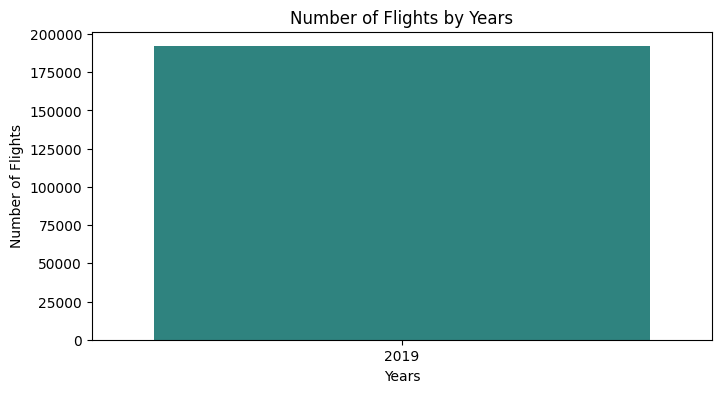

In [60]:
# Count of flights by Year
flights_by_Year = df['Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=flights_by_Year.index, y=flights_by_Year.values, palette='viridis')
plt.title('Number of Flights by Years')
plt.xlabel('Years')
plt.ylabel('Number of Flights')

plt.show()

# **ANALYSIS BASED ON MONTH**

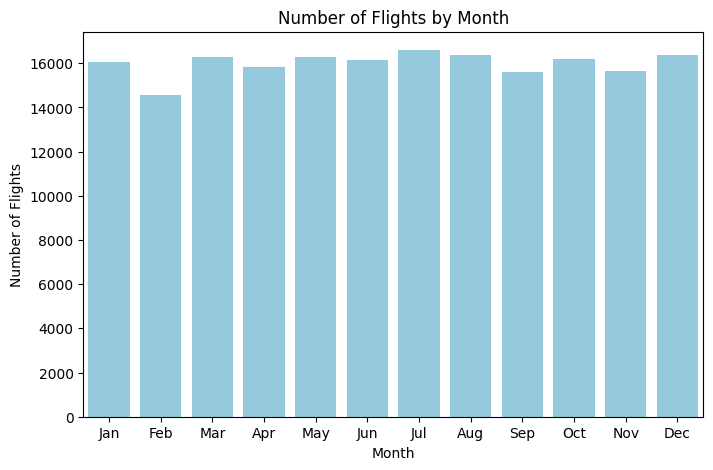

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count flights by month
flights_by_month = df['Month'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=flights_by_month.index, y=flights_by_month.values, color='Skyblue')
plt.title('Number of Flights by Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [62]:
monthly_delay = df.groupby('Month')['ArrDelayMinutes'].mean()
print(monthly_delay)


Month
1     14.564141
2     17.834316
3     12.337039
4     14.258805
5     15.464788
6     20.648403
7     18.175152
8     16.755694
9     10.537178
10    11.774932
11    11.221910
12    15.960983
Name: ArrDelayMinutes, dtype: float64


In [63]:
monthlyDep_delay = df.groupby('Month')['DepDelayMinutes'].mean()
print(monthlyDep_delay)

Month
1     14.057374
2     17.075504
3     12.504452
4     14.241290
5     15.264628
6     20.033742
7     18.071579
8     16.607865
9     10.651504
10    11.679894
11    11.208751
12    16.099621
Name: DepDelayMinutes, dtype: float64


## **Average of Arrival and Departure Delay By months**

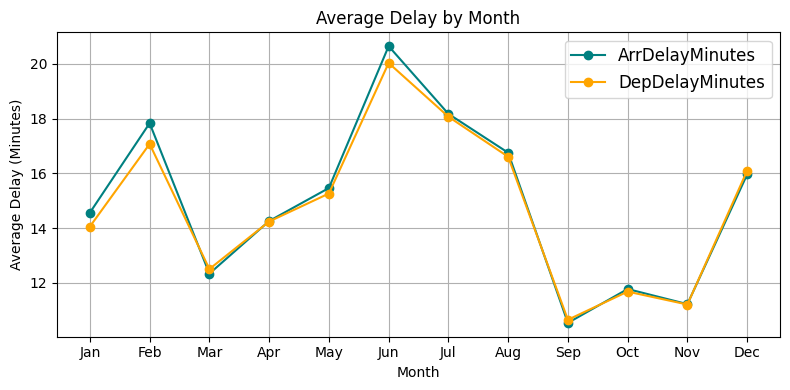

In [64]:
#  Average of DepartureDelay By months
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
monthly_delay.plot(kind='line', marker='o', color='teal', title='Average Delay by Month')
monthlyDep_delay.plot(kind='line', marker='o', color='Orange', title='Average Delay by Month')

plt.xlabel('Month')
plt.ylabel('Average Delay (Minutes)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()


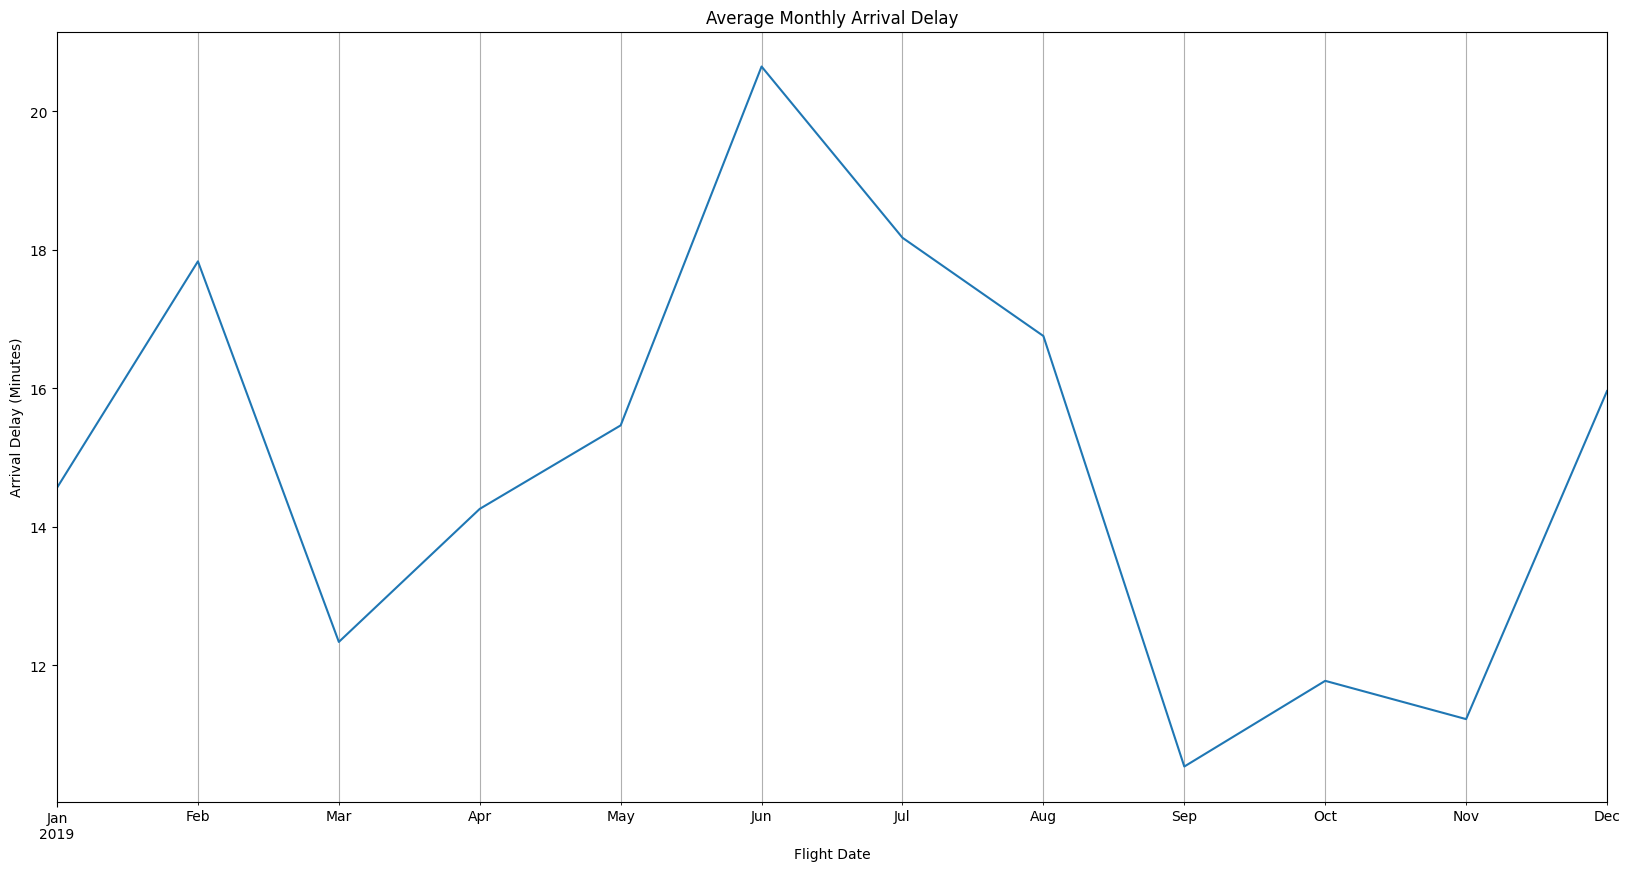

In [65]:
plt.figure(figsize=(20, 10))
monthly_delayes = df.groupby(df['FlightDate'].dt.to_period('M'))['ArrDelayMinutes'].mean()
monthly_delayes.plot(kind='line', title='Average Monthly Arrival Delay')
plt.grid(True,which='minor',axis='both')
plt.xlabel('Flight Date')
plt.ylabel('Arrival Delay (Minutes)')
plt.show()


# **WEEKLY ANALYSIS OF FLIGHTS AND DELAYS**

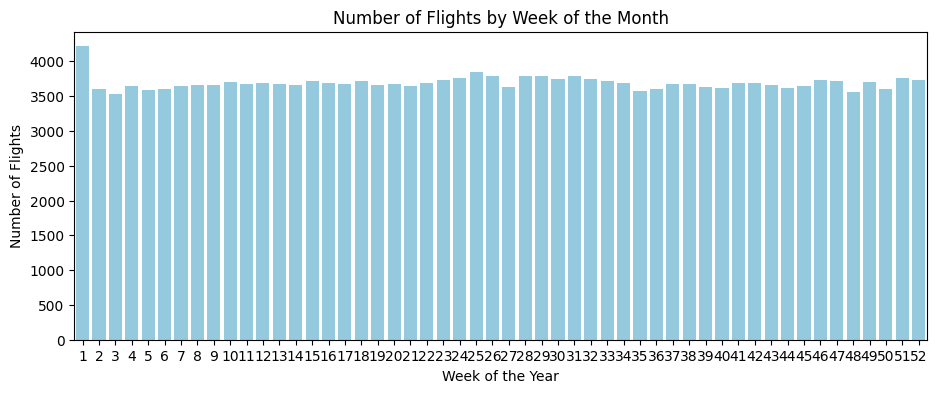

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # Import the matplotlib library

# Count flights by week
flights_by_week = df['Week'].value_counts().sort_index()

# Plot
plt.figure(figsize=(11, 4))
sns.barplot(x=flights_by_week.index, y=flights_by_week.values, color='Skyblue')
plt.title('Number of Flights by Week of the Month')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Flights')
plt.show()

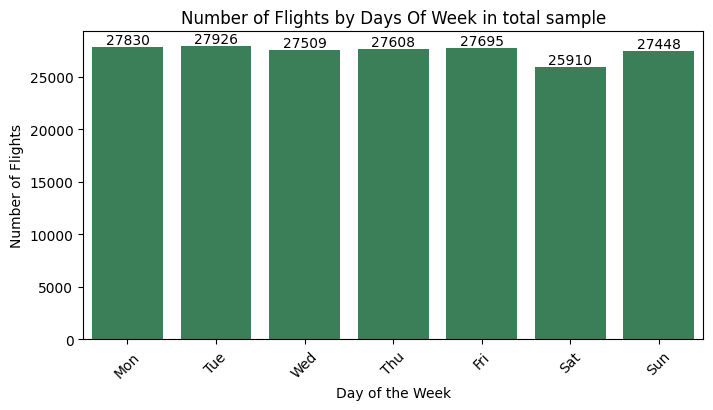

In [67]:
# Count flights by week
flights_by_week = df['DayOfWeek'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=flights_by_week.index, y=flights_by_week.values, color='SeaGreen')

# Add labels on each bar
for i, value in enumerate(flights_by_week.values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)
plt.title('Number of Flights by Days Of Week in total sample')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()

###**Average arrival Delay By Each Day Of Week**

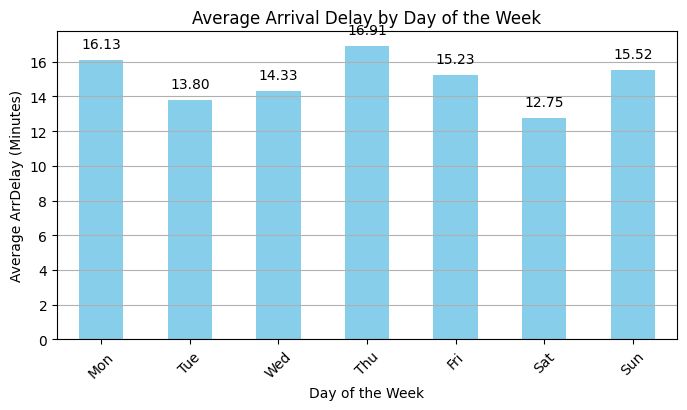

In [68]:
import matplotlib.pyplot as plt

# Calculate weekly_delay before using it
weekly_delay = df.groupby('DayOfWeek')['ArrDelayMinutes'].mean()
plt.figure(figsize=(8, 4))

weekly_delay.plot(kind='bar', color='skyBlue', title='Average Arrival Delay by Day of the Week')

# Add labels on each bar
for i, value in enumerate(weekly_delay.values):
    plt.text(i, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Day of the Week')
plt.ylabel('Average ArrDelay (Minutes)')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.grid(axis='y')
plt.show()


In [69]:
# Check the columns in the DataFrame
print(df.columns)

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [70]:

# Check the reult of Dest Column
print(df[['Dest']].head())

  Dest
0  PDX
1  FLL
2  MSP
3  TYS
4  TPA


# **ANALYSIS BASED ON DEST AND ORIGIN**

In [71]:
# Group by 'Dest' and calculate average delay
delay_by_dest = df.groupby('Dest')['ArrDelayMinutes'].mean().sort_values(ascending=False)

# Display top 10 destinations with the highest average delay
print(delay_by_dest.head(10))

Dest
MQT    89.769231
PBG    69.000000
COD    66.161290
APN    64.428571
OGS    54.272727
UIN    49.666667
RKS    42.200000
EKO    41.684211
DUT    40.000000
JMS    39.636364
Name: ArrDelayMinutes, dtype: float64


In [72]:

# Now, the groupby should work
delay_by_dest = df.groupby('Origin')['DepDelayMinutes'].mean().sort_values(ascending=False)

# Display top 10 destinations with the highest average delay
print(delay_by_dest.head(10))

Origin
BJI    111.842105
UIN    108.545455
SMX    100.000000
MQT     90.536585
MEI     78.952381
ESC     74.466667
PQI     66.235294
SLN     63.263158
BKG     61.400000
ATY     61.166667
Name: DepDelayMinutes, dtype: float64


## **TOP 10 Origin With Highest Average Flight Departure Delay**

<ipython-input-73-8ebc2c61b639>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_dest.values, y=top_10_dest.index, palette='viridis')


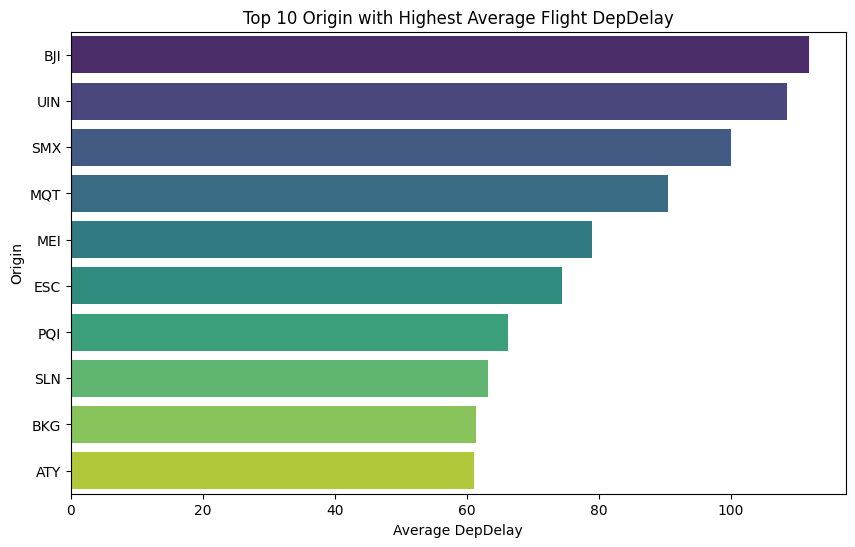

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 destinations with the highest average delay
top_10_dest = delay_by_dest.head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_dest.values, y=top_10_dest.index, palette='viridis')
plt.title('Top 10 Origin with Highest Average Flight DepDelay')
plt.xlabel('Average DepDelay')
plt.ylabel('Origin')
plt.show()

## **Analysing Departure Delays For Specific Destination**

In [74]:
# Example: Analyze delays for a specific destination (e.g., 'ABC')
specific_dest = 'VCT'

# Filter the DataFrame for the specific destination using the original 'Dest' column
df_specific_dest = df[df['Dest'] == specific_dest]

# Calculate average delay for this destination
avg_delay = df_specific_dest['DepDelay'].mean()
print(f'Average delay for {specific_dest}: {avg_delay:.2f}')

Average delay for VCT: nan


# **ANALYSIS BASED ON THE ELAPSED TIME OF FLIGHT**


In [75]:
# DELAY BY CRSELAPSETIME ()
print(df['CRSElapsedTime'])

0          45.0
1         160.0
2         188.0
3          90.0
4         189.0
          ...  
191921     91.0
191922    468.0
191923    260.0
191924    235.0
191925    230.0
Name: CRSElapsedTime, Length: 191926, dtype: float64


In [76]:
# Group by 'Dest' and calculate average delay
delay_by_dest = df.groupby('CRSElapsedTime')['ArrDelayMinutes'].mean().sort_values(ascending=False)

# Display top 10 destinations with the highest average delay
print(delay_by_dest.head(10))

CRSElapsedTime
508.0    214.000000
478.0    177.000000
441.0    123.666667
620.0     62.000000
483.0     59.000000
506.0     55.000000
468.0     55.000000
418.0     48.200000
577.0     46.000000
416.0     42.500000
Name: ArrDelayMinutes, dtype: float64


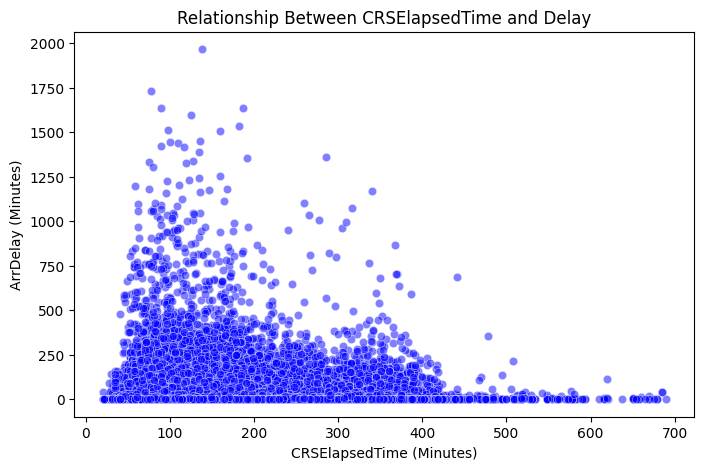

In [77]:

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of CRSElapsedTime vs Delay
plt.figure(figsize=(8, 5))
sns.scatterplot(x='CRSElapsedTime', y='ArrDelayMinutes', data=df, alpha=0.5, color='blue')
plt.title('Relationship Between CRSElapsedTime and Delay')
plt.xlabel('CRSElapsedTime (Minutes)')
plt.ylabel('ArrDelay (Minutes)')
plt.show()

In [78]:
print(df[['CRSElapsedTime','ArrDelayMinutes']].head())

   CRSElapsedTime  ArrDelayMinutes
0            45.0            126.0
1           160.0              0.0
2           188.0              0.0
3            90.0            184.0
4           189.0            448.0


## **FINDING CORRELATION BETWEEN CRSELapsedTime and ArrDelayMinutes**

In [79]:
# Calculate correlation coefficient
correlation = df['CRSElapsedTime'].corr(df['ArrDelayMinutes'])
print(f'Correlation between CRSElapsedTime and ArrDelay: {correlation:.2f}')

Correlation between CRSElapsedTime and ArrDelay: 0.00


In [80]:
# Create bins for CRSElapsedTime (e.g., every 30 minutes)
df['CRSElapsedTime_bin'] = pd.cut(df['CRSElapsedTime'], bins=range(0, int(df['CRSElapsedTime'].max()) + 30, 30))

# Check the bins
print(df['CRSElapsedTime_bin'].value_counts().sort_index())

CRSElapsedTime_bin
(0, 30]          46
(30, 60]       9543
(60, 90]      45051
(90, 120]     42937
(120, 150]    31514
(150, 180]    24558
(180, 210]    12463
(210, 240]     7668
(240, 270]     5412
(270, 300]     3806
(300, 330]     3532
(330, 360]     2759
(360, 390]     1710
(390, 420]      672
(420, 450]       77
(450, 480]       49
(480, 510]       32
(510, 540]       35
(540, 570]       17
(570, 600]       18
(600, 630]        8
(630, 660]        9
(660, 690]       10
Name: count, dtype: int64


<ipython-input-81-f4f056f7077d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_by_elapsed_time = df.groupby('CRSElapsedTime_bin')['ArrDelayMinutes'].mean()
<ipython-input-81-f4f056f7077d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_by_elapsed_time.index.astype(str), y=delay_by_elapsed_time.values, palette='coolwarm')


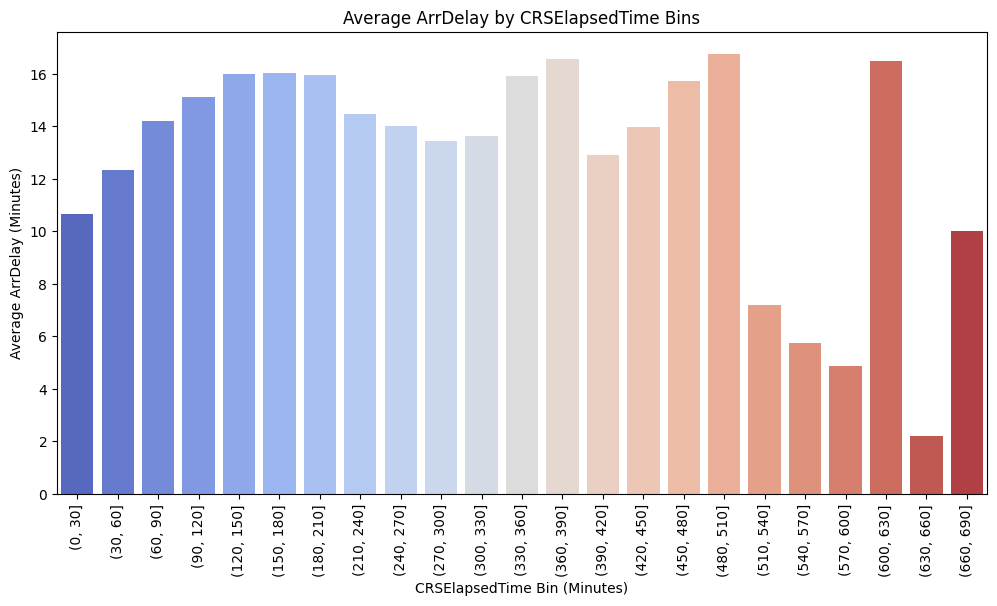

In [81]:
# Group by CRSElapsedTime_bin and calculate average delay
delay_by_elapsed_time = df.groupby('CRSElapsedTime_bin')['ArrDelayMinutes'].mean()

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=delay_by_elapsed_time.index.astype(str), y=delay_by_elapsed_time.values, palette='coolwarm')
plt.title('Average ArrDelay by CRSElapsedTime Bins')
plt.xlabel('CRSElapsedTime Bin (Minutes)')
plt.ylabel('Average ArrDelay (Minutes)')
plt.xticks(rotation=90)
plt.show()

In [82]:
# Create bins for CRSElapsedTime (e.g., every 100 minutes)
df['Distance_bin'] = pd.cut(df['Distance'], bins=range(0, int(df['Distance'].max()) + 100, 100))

# Check the bins
print(df['Distance_bin'].value_counts().sort_index())

Distance_bin
(0, 100]         3361
(100, 200]      14011
(200, 300]      20566
(300, 400]      21011
(400, 500]      18804
(500, 600]      16809
(600, 700]      15770
(700, 800]      10262
(800, 900]      11381
(900, 1000]     11557
(1000, 1100]     9606
(1100, 1200]     6497
(1200, 1300]     4041
(1300, 1400]     2870
(1400, 1500]     3474
(1500, 1600]     3448
(1600, 1700]     2099
(1700, 1800]     2925
(1800, 1900]     1211
(1900, 2000]     1616
(2000, 2100]      768
(2100, 2200]     1372
(2200, 2300]     1069
(2300, 2400]     1441
(2400, 2500]     2678
(2500, 2600]     1755
(2600, 2700]      672
(2700, 2800]      410
(2800, 2900]       79
(2900, 3000]       93
(3000, 3100]        8
(3100, 3200]        0
(3200, 3300]        2
(3300, 3400]       45
(3400, 3500]       18
(3500, 3600]        0
(3600, 3700]        0
(3700, 3800]       68
(3800, 3900]       14
(3900, 4000]       21
(4000, 4100]        0
(4100, 4200]       10
(4200, 4300]       22
(4300, 4400]        0
(4400, 4500]       

# **ANALYSIS BASED ON ARRIVAL TIME**

SPLITING ArrTime AS PER PART OF DAY

DAY   6AM - 12 PM

NIGHT    6 PM - 12PM

MIDDAY   12AM - 6 PM

MIDNIGHT 12AM - 6AM

In [84]:
def categorize_time(arr_time):
    if 600 <= arr_time < 1200:
        return 'Day (6 AM - 12 PM)'
    elif 1200 <= arr_time < 1800:
        return 'Midday (12 PM - 6 PM)'
    elif 1800 <= arr_time < 2400:
        return 'Night (6 PM - 12 AM)'
    else:
        return 'Midnight (12 AM - 6 AM)'

df['ArrivalTimeBlock'] = df['ArrTime'].apply(categorize_time)


In [85]:
time_block_delay = df.groupby('ArrivalTimeBlock')['ArrDelayMinutes'].mean()
print(time_block_delay)


ArrivalTimeBlock
Day (6 AM - 12 PM)          6.992092
Midday (12 PM - 6 PM)      11.951126
Midnight (12 AM - 6 AM)    51.893698
Night (6 PM - 12 AM)       19.202317
Name: ArrDelayMinutes, dtype: float64


## **Average Arrival Delay Based on Differrent Periods Of Day**

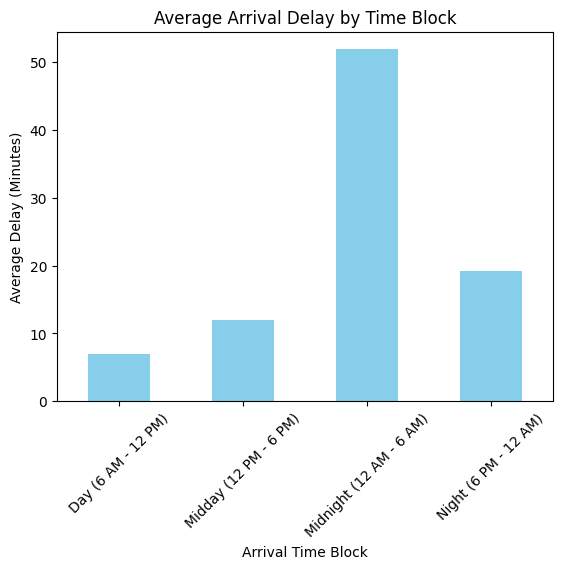

In [86]:
import matplotlib.pyplot as plt

time_block_delay.plot(kind='bar', color='skyblue', title='Average Arrival Delay by Time Block')
plt.xlabel('Arrival Time Block')
plt.ylabel('Average Delay (Minutes)')
plt.xticks(rotation=45)
plt.show()

# **ANALYSIS BASED ON ROUTE**

In [87]:
df['Route'] = df['Origin'] + ' → ' + df['Dest']


In [88]:
route_delay = df.groupby('Route')['ArrDelayMinutes'].mean().reset_index()


In [89]:
top_50_routes = route_delay.sort_values(by='ArrDelayMinutes', ascending=False).head(50)
print(top_50_routes)


          Route  ArrDelayMinutes
3179  LEX → FLL       983.000000
4050  OGG → SLC       865.000000
4326  ORF → FLL       362.000000
3980  MYR → MDT       305.333333
4250  ORD → MQT       279.375000
6078  TYS → MCO       251.000000
2282  GRR → PGD       242.666667
5391  SFB → FNT       225.666667
809   BWI → SRQ       220.000000
1752  DRO → ORD       216.000000
6004  TTN → DTW       215.500000
2349  HDN → ORD       201.000000
5714  SLN → ORD       200.000000
26    ABQ → MSP       195.666667
304   ATY → PIR       183.750000
4895  RAP → LAS       171.500000
2043  EWR → SMF       165.800000
483   BHM → SFO       165.000000
5442  SFO → ASE       163.875000
3542  MEI → DFW       163.444444
6054  TVC → DFW       162.000000
3569  MEM → SFB       156.666667
508   BLI → OGG       156.000000
4866  PVD → RDU       141.000000
5519  SFO → STS       139.333333
2545  IAD → PBG       137.125000
2583  IAH → ASE       126.100000
1964  EWR → ANC       125.000000
5800  SRQ → PIT       125.000000
1291  DAY 

### **TOP 50  ROUTES WITH HIGHEST AVERAGE ARRIVAL DELAY**

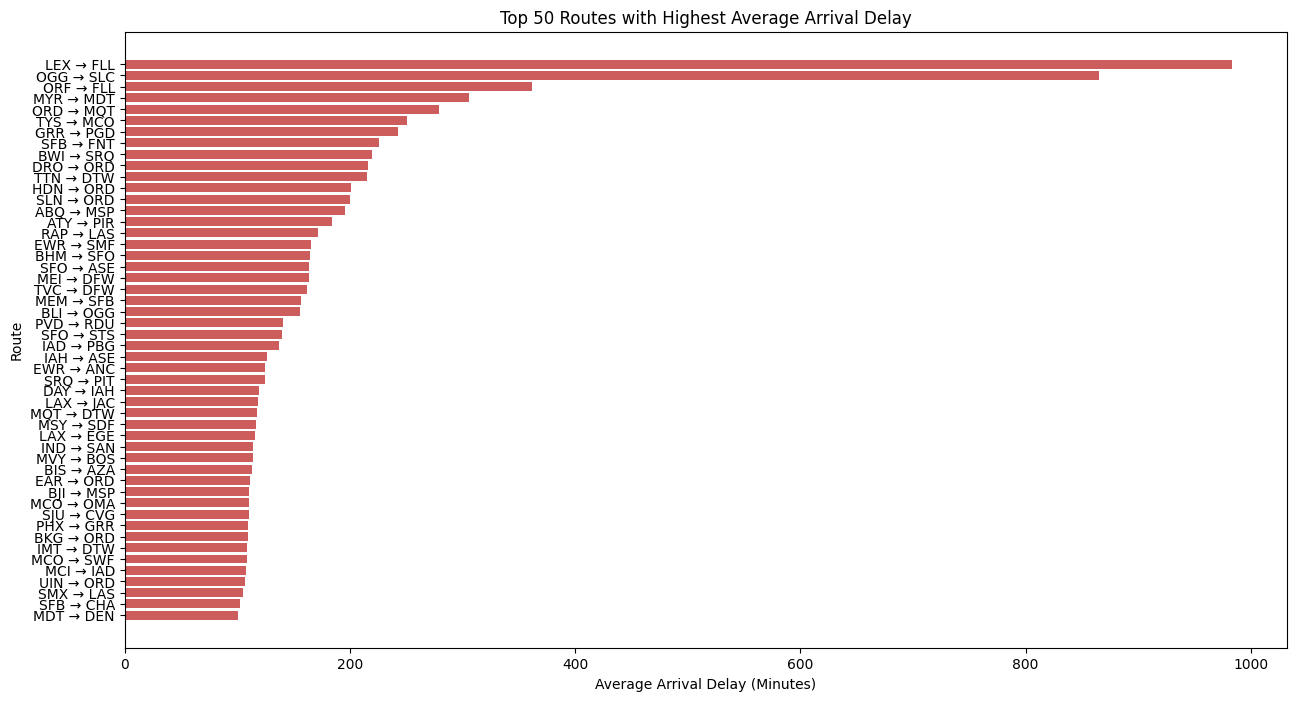

In [90]:
plt.figure(figsize=(15, 8))
plt.barh(top_50_routes['Route'], top_50_routes['ArrDelayMinutes'], color='indianred')
plt.xlabel('Average Arrival Delay (Minutes)')
plt.ylabel('Route')
plt.title('Top 50 Routes with Highest Average Arrival Delay')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


# **ANALYSIS BASED ON AIRLINES**

In [104]:
df['Airline'].nunique()      # NO OF UNIQUE AIRLINES

26

In [91]:
airline_delay = df.groupby('Airline')['ArrDelayMinutes'].mean().reset_index()


In [92]:
airline_delay = airline_delay.sort_values(by='ArrDelayMinutes', ascending=False)
print(airline_delay)


                                      Airline  ArrDelayMinutes
6   Commutair Aka Champlain Enterprises, Inc.        32.017751
24                      Trans States Airlines        29.858131
19                     Peninsula Airways Inc.        28.703704
12                   ExpressJet Airlines Inc.        23.344079
17                            JetBlue Airways        22.136490
14   GoJet Airlines, LLC d/b/a United Express        20.022026
0                 Air Wisconsin Airlines Corp        18.896344
25                      United Air Lines Inc.        18.076887
13                     Frontier Airlines Inc.        17.944756
18                         Mesa Airlines Inc.        17.868265
21                      SkyWest Airlines Inc.        17.471623
7                            Compass Airlines        16.751445
2                               Allegiant Air        16.714630
11                                  Envoy Air        16.539611
5                                 Comair Inc.        15

## **Average Arrival Delay by Each Airlines**

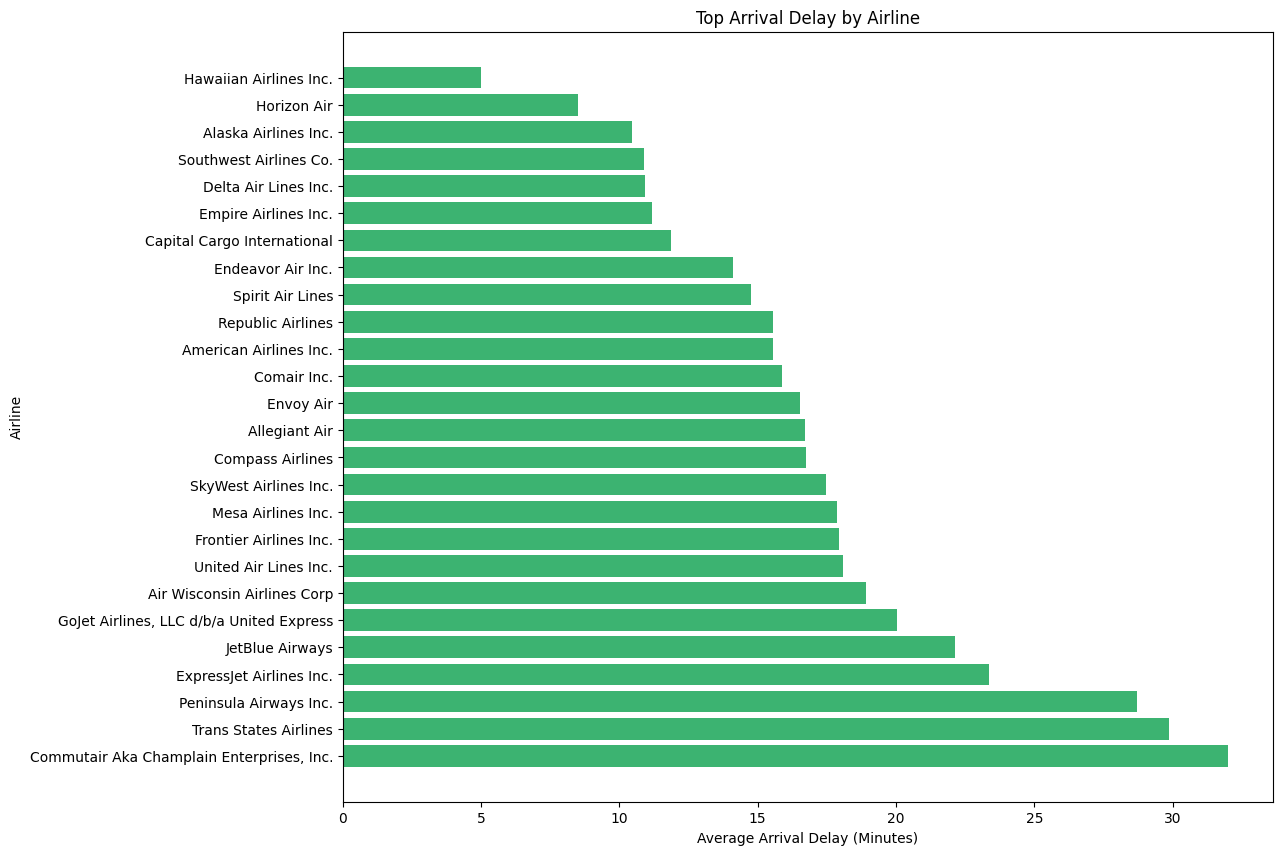

In [93]:
plt.figure(figsize=(12, 10))
plt.barh(airline_delay['Airline'], airline_delay['ArrDelayMinutes'], color='mediumseagreen')
plt.xlabel('Average Arrival Delay (Minutes)')
plt.ylabel('Airline')
plt.title('Top Arrival Delay by Airline')
plt.show()


# **ANALYSIS ON TAXI IN AND TAXI OUT**

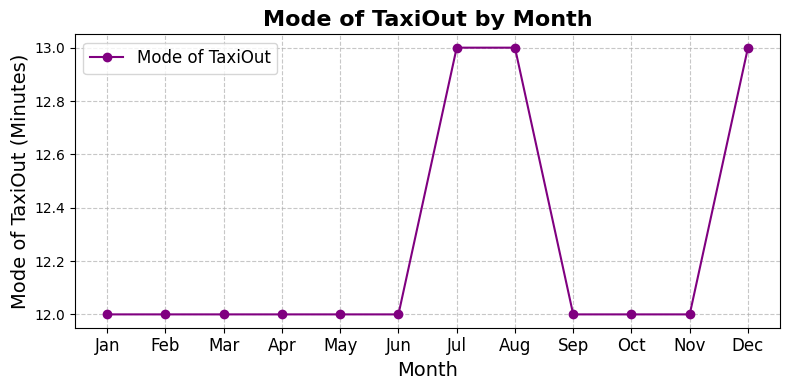

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Month' and find the mode of 'TaxiOut'
taxiout_mode_by_month = df.groupby('Month')['TaxiOut'].agg(lambda x: x.mode()[0])

# Plot the mode of TaxiOut by month
plt.figure(figsize=(8, 4))
plt.plot(taxiout_mode_by_month.index, taxiout_mode_by_month.values, marker='o', linestyle='-', color='purple', label='Mode of TaxiOut')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Mode of TaxiOut (Minutes)', fontsize=14)
plt.title('Mode of TaxiOut by Month', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


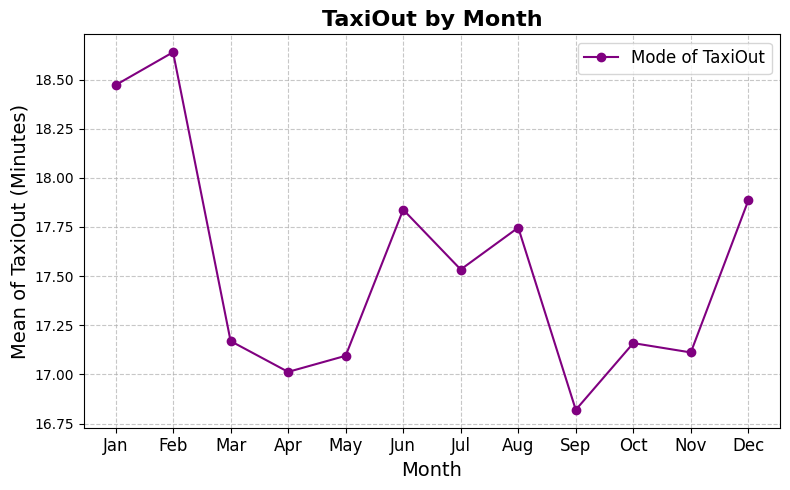

In [106]:
# Group by 'Month' and find the mode of 'TaxiOut'
taxiout_mode_by_month = df.groupby('Month')['TaxiOut'].mean()

# Plot the mode of TaxiOut by month
plt.figure(figsize=(8, 5))
plt.plot(taxiout_mode_by_month.index, taxiout_mode_by_month.values, marker='o', linestyle='-', color='purple', label='Mode of TaxiOut')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Mean of TaxiOut (Minutes)', fontsize=14)
plt.title('TaxiOut by Month', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()